In [7]:
import rf
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
from matplotlib import pyplot as plt

# Random Fourier Features

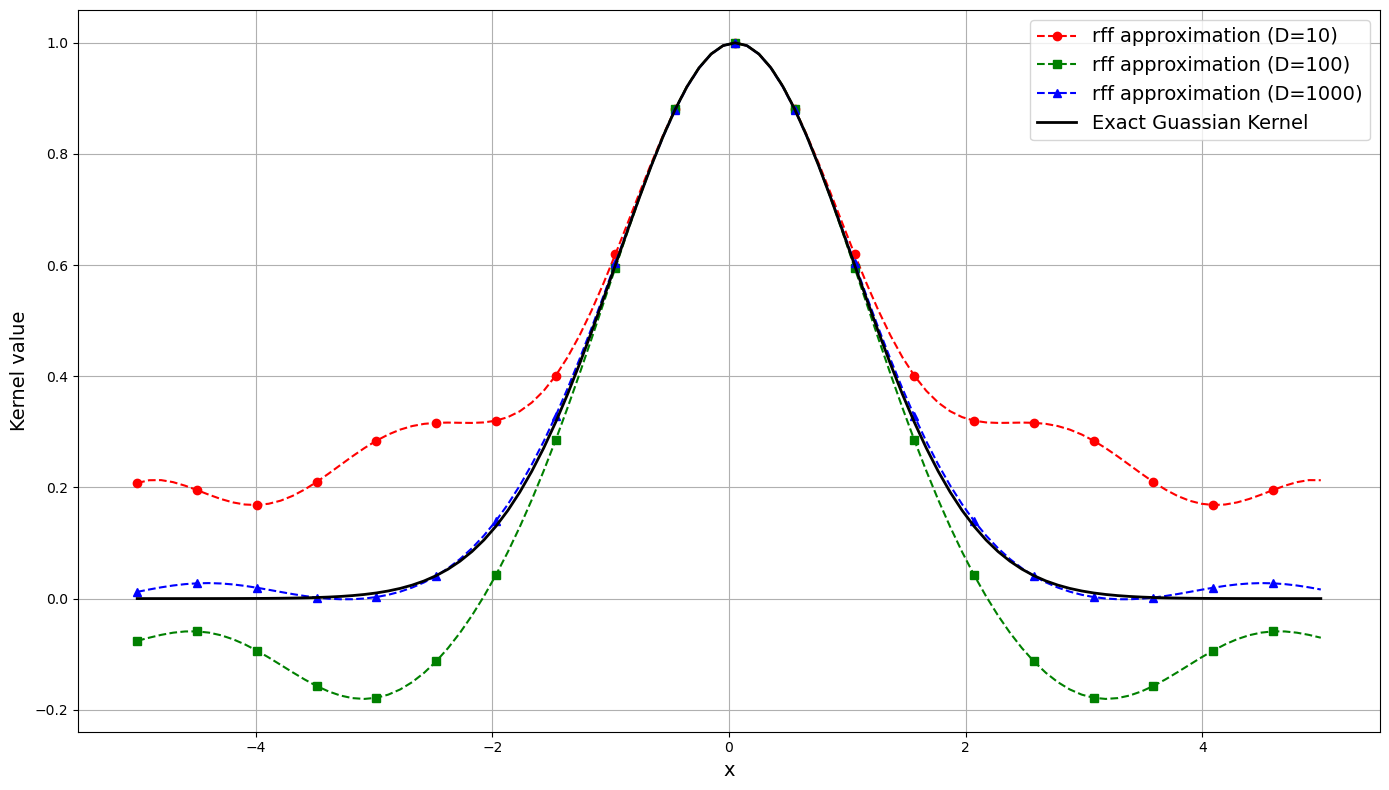

In [8]:
x = np.linspace(-5, 5, 100).reshape(-1, 1)
# Gaussian kernel with \sigma = 1
gaussian_kernel_exact = rbf_kernel(x, None, 1/2)
# We observe the kernel value of the 50th data point with respect to all other data points, including itself.
ref = 50

plt.figure(figsize=(14, 8))
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
for i, D in enumerate([10, 100, 1000]):
    Z = rf.rff_1(x, D)
    gaussian_kernel_approximate = Z @ Z.T
    plt.plot(x, gaussian_kernel_approximate[ref, :], label=f'rff approximation (D={D})', color=colors[i], linestyle='--', marker=markers[i], markevery=5)
    
plt.plot(x, gaussian_kernel_exact[ref, :], label='Exact Guassian Kernel', color='black', linewidth=2)

plt.xlabel('x', fontsize=14)
plt.ylabel('Kernel value', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

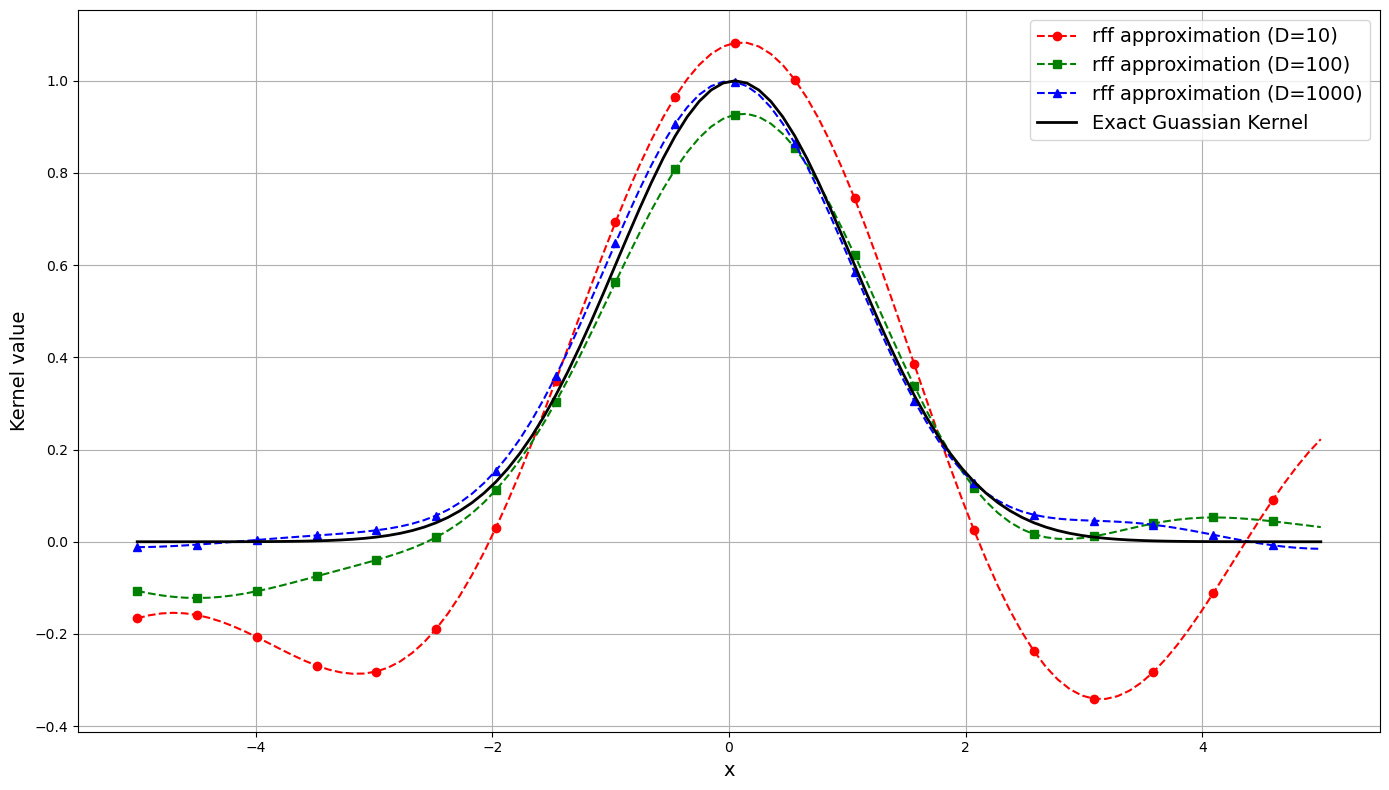

In [9]:
x = np.linspace(-5, 5, 100).reshape(-1, 1)
# Gaussian kernel with \sigma = 1
gaussian_kernel_exact = rbf_kernel(x, None, 1/2)
# We observe the kernel value of the 50th data point with respect to all other data points, including itself.
ref = 50

plt.figure(figsize=(14, 8))
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
for i, D in enumerate([10, 100, 1000]):
    Z = rf.rff_2(x, D)
    gaussian_kernel_approximate = Z @ Z.T
    plt.plot(x, gaussian_kernel_approximate[ref, :], label=f'rff approximation (D={D})', color=colors[i], linestyle='--', marker=markers[i], markevery=5)
    
plt.plot(x, gaussian_kernel_exact[ref, :], label='Exact Guassian Kernel', color='black', linewidth=2)

plt.xlabel('x', fontsize=14)
plt.ylabel('Kernel value', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()